<html>
<body>
<div align="center">
<h3>Prepared by Omar Mahmoud</h3>
    
<h1>EDA on Netflix Movies and TV Shows</h1>

<h6>Overview: Netflix dominates the streaming media industry as the leading player. Originally established as a DVD rental service through mail-order, the company has undergone a complete transformation of its business model to adapt to the continuously evolving technology landscape. This transformation has enabled Netflix to grow to over 200 million subscribers globally, and the company is now recognized as one of the largest media publishers globally, thanks to its Netflix Originals program.</h6>

<h3><a href="https://www.linkedin.com/in/omar-mahmoud-5bb616175/">LinkedIn</a>&nbsp; <a href="https://twitter.com/OmarMah25544092">Twitter</a>&nbsp; <a href="https://www.instagram.com/3amory99/">Instagram</a>&nbsp; <a href="https://www.facebook.com/Mora898/">Facebook</a></h3>
</div>

</div>
</body>
</html>

## Identifying the data
### FEATURES:
##### 1- SHOW-ID - Unique id of each show (not much of a use for us in this notebook)
##### 2- TYPE - The category of a show, can be either a Movie or a TV Show
##### 3- TITLE - Name of the show
##### 4- DIRECTOR - Name of the director(s) of the show
##### 5- CAST - Name of the show
##### 6- COUNTRY - Name of countries the show is available to watch on Netflix
##### 7- DATE ADDED - Date when the show was added on Netflix
##### 8- RATING - Show rating on netflix
##### 9- RELEASE YEAR - Release year of the show
##### 10- DURATION - Time duration of the show
##### 11- LISTED IN - Genre of the show

## importing libs

In [28]:
# To work with data presented in a tabular format, the pandas library is necessary.
import pandas as pd
# To round the data in a correlation matrix and using statistics methods, the numpy library will be necessary.
import numpy as np 
# For data visualization, the libraries matplotlib, seaborn, and plotly are necessary.
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# To visualize missing values in data, the missingno library will be necessary.
import missingno

In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import plotly.express as px

## importing Dataset

In [33]:
df = pd.read_csv("netflix_dataset.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [34]:
# Display the dimensions of the data
print(f'Netflix dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

Netflix dataset contains 7787 rows and 12 columns


In [35]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data types

In [36]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Missing values

In [37]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

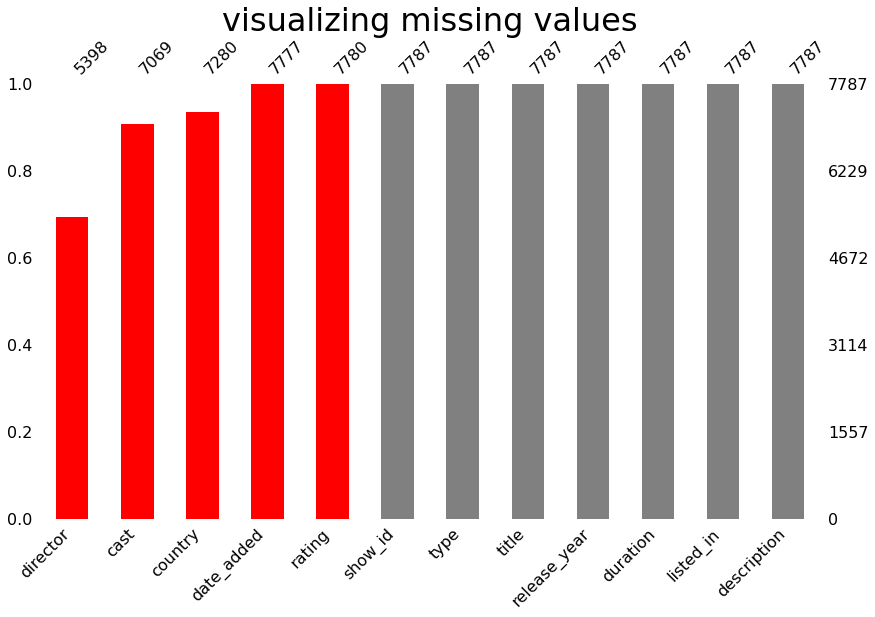

In [38]:
color = ['red','red','red','red','red','grey','grey','grey','grey','grey','grey','grey']
missingno.bar(df, color = color ,sort = 'ascending',figsize = (14,8))
plt.title("visualizing missing values",fontsize = 32)
plt.show()

Most of the values that missing is from the director column but also sum of them is from the cast, country, date_added columns and very little from the rating column.

so let's handle the missing values:

In [39]:
# Fill Director's null values of No data available
df['director'] = df['director'].fillna('No data available')
# Fill cast's null values of No data available
df['cast'] = df['cast'].fillna('No data available')
# Fill country's null values of the mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
# Fill date_added's null values of the mode
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
# Fill rating's null values of the mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

### Check the null values 

In [40]:
print("count of null values")
print(df.isna().sum())
print("count of null values")
print("The summation of null values over the dataset is {}".format(df.isna().sum().sum()))

count of null values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
count of null values
The summation of null values over the dataset is 0


# Duplicated values
There is no duplicated rows in the dataset



In [41]:
df.duplicated().sum()

0

#### Add new Columns
- year
- month
- rating_ages

In [42]:
df['year'] = pd.DatetimeIndex(df['date_added']).year
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [43]:
df['year'].head(10)

0    2020
1    2016
2    2018
3    2017
4    2020
5    2017
6    2020
7    2019
8    2019
9    2017
Name: year, dtype: int64

In [44]:
df['month'].head(10)

0     8
1    12
2    12
3    11
4     1
5     7
6     6
7    11
8     4
9    12
Name: month, dtype: int64

In [45]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': '6',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}
df['ratings_ages'] = df['rating'].replace(ratings_ages)
df['ratings_ages'].head(10)

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
5    Adults
6    Adults
7    Adults
8     Teens
9    Adults
Name: ratings_ages, dtype: object

In [46]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages
0,s1,TV Show,3%,No data available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,Teens


# Data analysis and Conclusions

1. How content is distributed ?

2. What are the counteries with the highest nnumber of Movies & TV-shows ?

3. what is the content added in each year ?

4. what are the ratio of the genres ?

1. How content is distributed ?

In [47]:
count = df['type'].value_counts().reset_index()
fig = px.pie(count, values = 'type', names = 'index', title='Population of Neflix Production Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The pie chart displays the distribution of movies and TV shows in a dataset, it would be accurate to interpret it as indicating that 69.1% of the dataset consists of movies, while the remaining 30.9% is made up of TV shows.

2. What are the counteries with the highest nnumber of Movies & TV-shows ?

In [48]:
countries = pd.crosstab(df['country'],['type']).sort_values(by='type',ascending=True)[-10:].reset_index()
countries

col_0,country,type
0,Mexico,100
1,Egypt,101
2,France,115
3,Spain,134
4,Canada,177
5,South Korea,183
6,Japan,226
7,United Kingdom,397
8,India,923
9,United States,3062


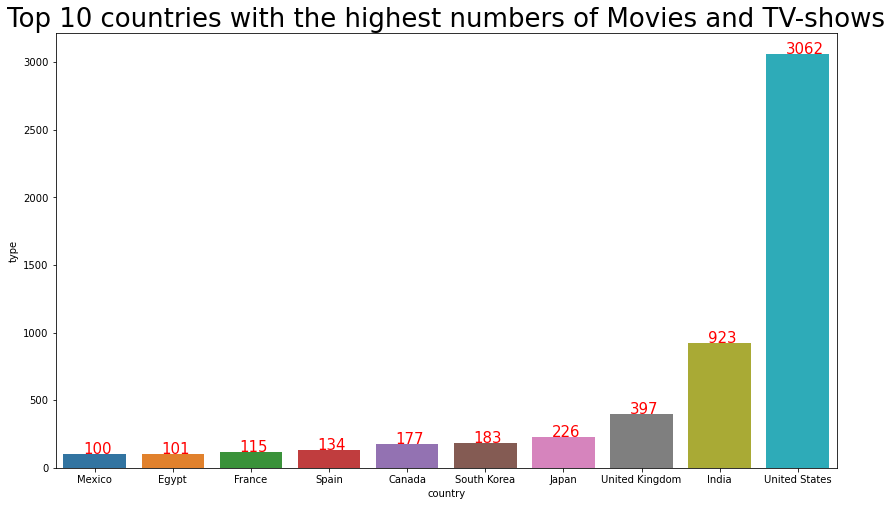

In [49]:
plt.figure(figsize=(14,8))
axeis = sns.barplot(x = countries['country'], y = countries['type'])
plt.title('Top 10 countries with the highest numbers of Movies and TV-shows', fontsize = 26)
for i in axeis.patches:
    axeis.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='red')

* We can conclude that the United States is the highest country that shows Movies and TV-shows

In [50]:
# get all movies records
all_movies_df = df[df["type"]=="Movie"]
movies = all_movies_df['country'].value_counts().reset_index()[:10]
movies

,index,country
0,United States,2080
1,India,852
2,United Kingdom,193
3,Canada,118
4,Spain,89
5,Egypt,89
6,Turkey,73
7,Philippines,70
8,France,69
9,Japan,69


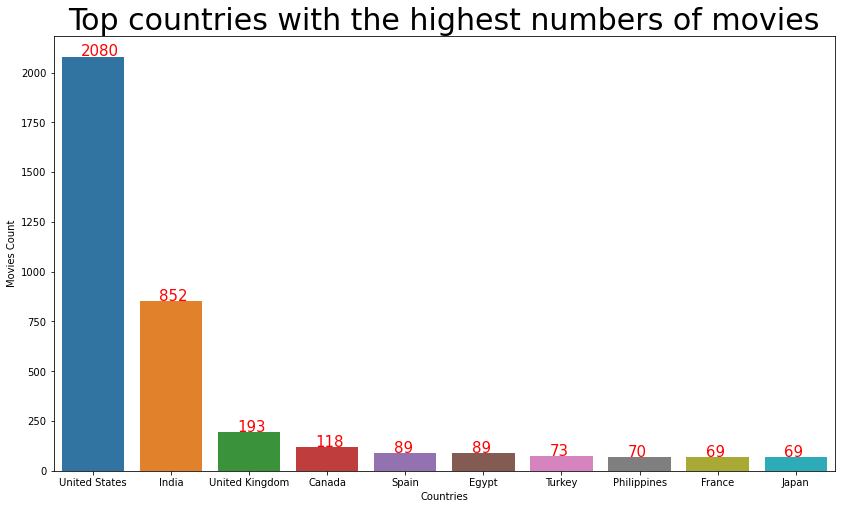

In [51]:
plt.figure(figsize = (14,8))
plt.title("Top countries with the highest numbers of movies",fontsize=30)
ax = sns.barplot(x = movies["index"].rename('Countries'), y = movies["country"].rename('Movies Count'))
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='red')

In [52]:
tv = df[df["type"]=="TV Show"]
tvshows = tv["country"].value_counts().reset_index()[:10]
tvshows

,index,country
0,United States,982
1,United Kingdom,204
2,Japan,157
3,South Korea,147
4,India,71
5,Taiwan,68
6,Canada,59
7,France,46
8,Australia,46
9,Spain,45


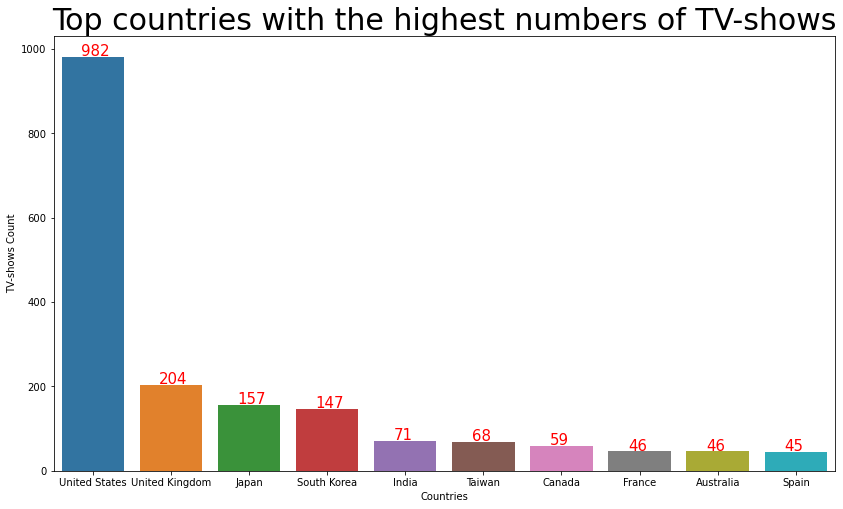

In [53]:
plt.figure(figsize=(14,8))
plt.title("Top countries with the highest numbers of TV-shows",fontsize=30)
ax=sns.barplot(x = tvshows["index"].rename('Countries'), y = tvshows["country"].rename('TV-shows Count'))
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='red')

3. what is the content added in each year ?

In [54]:
df["year"].value_counts().sort_index()

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      25
2015      88
2016     443
2017    1225
2018    1685
2019    2153
2020    2019
2021     117
Name: year, dtype: int64

C:\Users\Mora8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



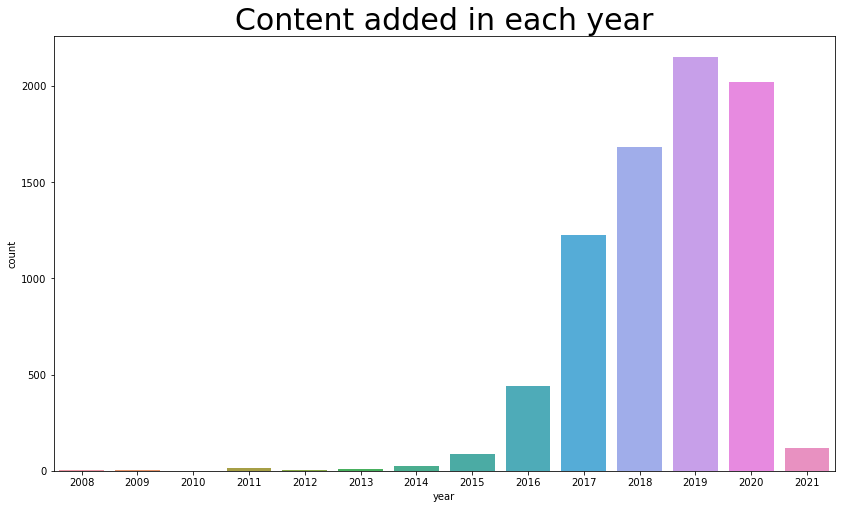

In [55]:
plt.figure(figsize=(14,8))
sns.countplot(df["year"])
plt.title("Content added in each year",fontsize=30)
plt.show()

The data shows that Netflix has been adding more movies and TV shows each year since 2011, with the highest number added in 2019. However, there was a decrease in content added in 2021, potentially due to the COVID-19 pandemic. This trend suggests that Netflix has been investing heavily in original content and expanding partnerships with content creators to meet the growing demand for streaming content.

In [56]:
# get all movies records
all_movies_df = df[df["type"]=="Movie"]
movies = all_movies_df['year'].value_counts().reset_index()
movies

,index,year
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


C:\Users\Mora8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



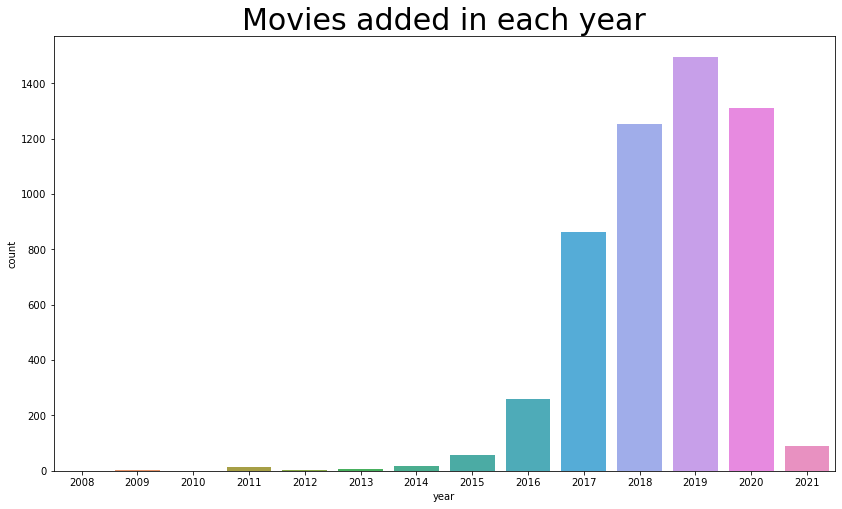

In [57]:
m = df[df["type"]=="Movie"]
plt.figure(figsize=(14,8))
sns.countplot(m["year"])
plt.title("Movies added in each year",fontsize=30)
plt.show()

2019 is the highest year in displaying Movies

In [58]:
# get all TV shows records
all_movies_df = df[df["type"]=="TV Show"]
movies = all_movies_df['year'].value_counts().reset_index()
movies

,index,year
0,2020,707
1,2019,656
2,2018,430
3,2017,361
4,2016,185
5,2015,30
6,2021,29
7,2014,6
8,2013,5
9,2008,1


C:\Users\Mora8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



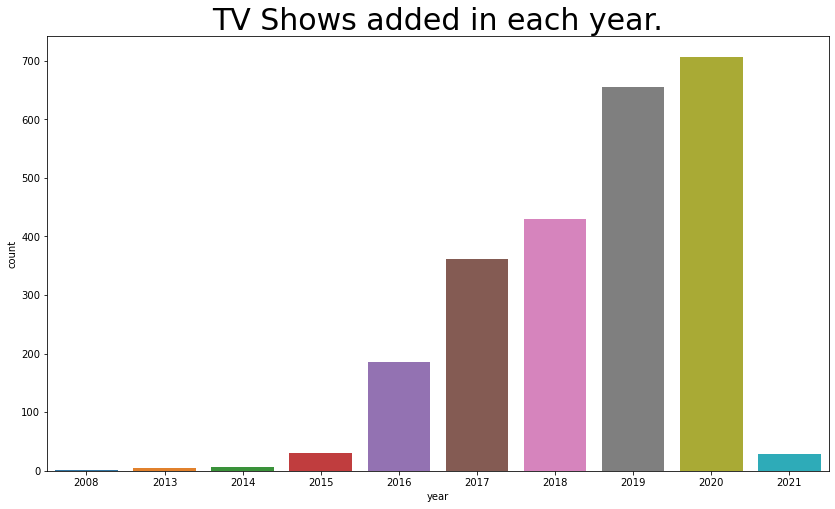

In [59]:
tv = df[df["type"]=="TV Show"]
plt.figure(figsize=(14,8))
sns.countplot(tv["year"])
plt.title("TV Shows added in each year.",fontsize=30)
plt.show()

2020 is the highest year in displaying TV shows

- what are the ratio of the genres ?

In [78]:
pie2 = px.pie(df, names = 'ratings_ages', values = df.index, title='A figure showing the age groups targeted by the Netflix productions')
pie2.update_traces(textposition='inside', textinfo='percent+label')
pie2.show()

In [76]:
movies = df[df["type"]=="Movie"]
tvshows = df[df["type"]=="TV Show"]

In [77]:
# visualizing the type of content and age groups present in movies. A figure showing the age groups targeted by the Netflix Movies
px.pie(movies, names="ratings_ages", values = movies.index, title = "Type of content present in movies.")

In [81]:
# visualizing the type of content and age groups present in TV-shows. A figure showing the age groups targeted by the Netflix TV-shows.
px.pie(tvshows, names="ratings_ages", values = tvshows.index, title = "Type of content present in TV-shows.")

# Recommendation system

In [91]:
# import the required libs  {TfidfVectorizer}
from sklearn.feature_extraction.text import TfidfVectorizer
# import linear kernel
from sklearn.metrics.pairwise import linear_kernel

In [83]:
# remove stop words
tfidf = TfidfVectorizer(stop_words="english")

In [87]:
# replace null values with empty strings
df['description'] = df['description'].fillna("")

In [89]:
#Construct the TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

In [90]:
# printing the shape of the matrix
print(tfidf_matrix.shape)

(7787, 17905)


In [92]:
# compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [94]:
indices = pd.Series(df.index, index = df['title'] ).drop_duplicates()

In [96]:
indices.head()

title
3%       0
7:19     1
23:59    2
9        3
21       4
dtype: int64

In [100]:
def get_recommendations(title , cosine_sim = cosine_sim):
    idx = indices[title]
    
    # get the pairwise simmilarity score of that movie with all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores , key = lambda x:x[1] , reverse=True)
    
    # get the 10 most similar movies 
    sim_scores = sim_scores[1:11]
    
    # get the movies indices
    movies_indices = [i[0] for i in sim_scores]
    
    # return the top 10 most similar movies
    return df["title"].iloc[movies_indices]

In [105]:
get_recommendations("21")

4563                    Ocean's Eleven
2669                        Head Count
2426                  Girlfriend's Day
1347       Chocolate City: Vegas Strip
2259                      Frank & Lola
4456                              Next
3362                            Khushi
2135    Fear and Loathing in Las Vegas
5085    Ralphie May: Imperfectly Yours
6946                         The Trust
Name: title, dtype: object

## That's great keep it up✨